In [ ]:
import pandas as pd
 
# reading the log lines
# cat syslog | grep -A1 DHCPREQUEST | grep DHCPACK > dhcp.csv
df = pd.read_csv("dhcp.csv", sep=' ', header=None)
df.head()

In [138]:
times = pd.to_datetime("2023-09-0"+df[2].astype(str)+" "+df[3])
counts = df.groupby([times.dt.day, times.dt.hour])[8].count()
counts = pd.DataFrame(counts)
counts.head()

8
4 0   48
  1   95
  2  168
  3  109
  4  104

In [139]:
counts.columns = ['count']
counts['day'], counts['hour'] = zip(*counts.index)
counts.head()

count  day  hour
4 0     48    4     0
  1     95    4     1
  2    168    4     2
  3    109    4     3
  4    104    4     4

In [140]:
counts['time'] = pd.to_datetime(counts['hour'].astype(str) + ":00", format="%H:%M")
counts['day'] = pd.to_datetime("2023-09-" + counts['day'].astype(str))
counts.head()

count        day  hour                time
4 0     48 2023-09-04     0 1900-01-01 00:00:00
  1     95 2023-09-04     1 1900-01-01 01:00:00
  2    168 2023-09-04     2 1900-01-01 02:00:00
  3    109 2023-09-04     3 1900-01-01 03:00:00
  4    104 2023-09-04     4 1900-01-01 04:00:00

/home/seb/.virtualenvs/jupyter/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/seb/.virtualenvs/jupyter/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/seb/.virtualenvs/jupyter/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/seb/.virtualenvs/jupyter/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndar

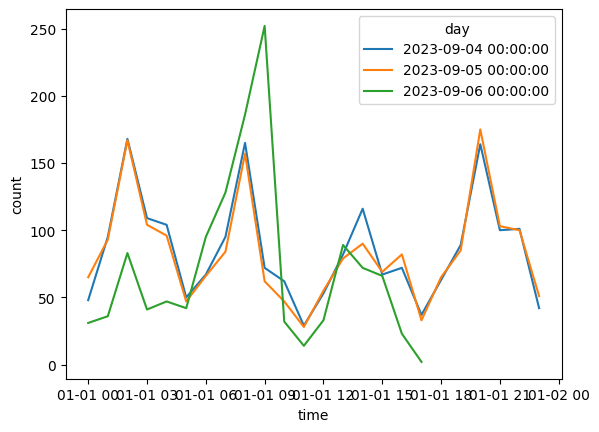

In [142]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(x='time',y='count', data=counts, hue='day')
plt.show()